In [1]:
#Importinng necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the dataset
cars_df = pd.read_csv('USA_cars_datasets.csv')

Content

This dataset includes 12 features:

Feature	Type	Description

Price	Integer	The sale price of the vehicle in the ad

Years	Integer	The vehicle registration year

Brand	String	The brand of car

Model	String	model of the vehicle

Color	String	Color of the vehicle

State/City	String	The location in which the car is being available for purchase

Mileage Float	miles traveled by vehicle

Vin	 String	The vehicle identification number is a collection of 17 characters (digits and capital letters)

Title  Status	String	This feature included binary classification, which are clean title vehicles and salvage insurance

Lot	 Integer	A lot number is an identification number assigned to a particular quantity or lot of material from a single                     manufacturer.For cars, a lot number is combined with a serial number to form the Vehicle Identification Number.


Condition	String	Time

In [3]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


In [4]:
cars_df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [5]:
#Checking the null values
cars_df.isnull().sum()

Unnamed: 0      0
price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

In [6]:
cars_df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


## Data cleaning

In [7]:
#Since we don't need the unnamed, condition and vin columns we will drop them
cars_df.drop(['Unnamed: 0','vin','condition'],inplace=True,axis=1)

## Exploratory Data Analysis

In [8]:
sns.set_style('whitegrid')

In [9]:
#Let's see how many countries we have in our data
cars_df['country'].value_counts()

 usa       2492
 canada       7
Name: country, dtype: int64

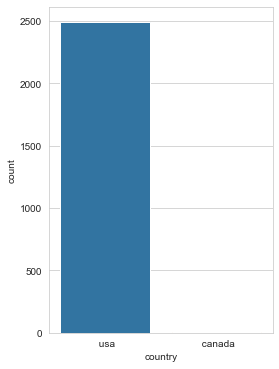

In [10]:
plt.figure(figsize=(4,6))
sns.countplot(cars_df['country'])

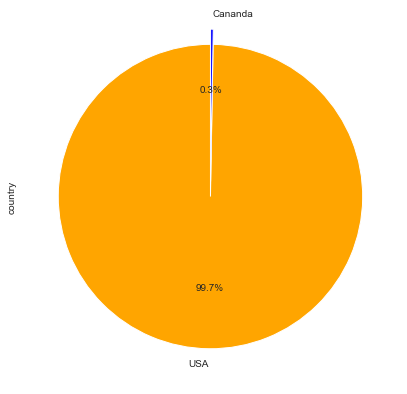

In [11]:
cars_df['country'].value_counts().plot(kind='pie',
                                            autopct='%1.1f%%',
                                            labels= ['USA','Cananda'],
                                            colors=['orange','blue'],
                                            figsize=(7,7),
                                            startangle=90,
                                            explode=[0,0.1])

This is why the countplot didn't show anything in its canada column


### Let's see the average price of a vehicle in each country

(array([0, 1]), <a list of 2 Text xticklabel objects>)

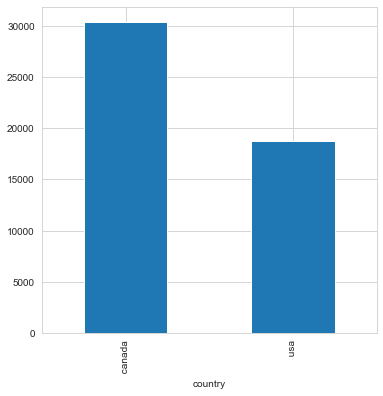

In [12]:
cars_df.groupby('country')['price'].mean().plot(kind='bar',figsize=(6,6))
plt.xticks(rotation=90)

### Let's analyse the title status column and find out what fraction of the cars have to salvage insurance

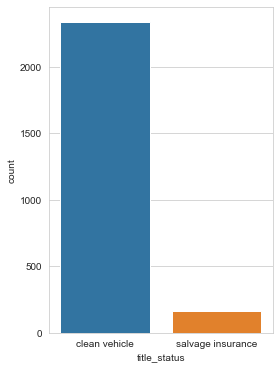

In [13]:
plt.figure(figsize=(4,6))
sns.countplot(cars_df['title_status'])

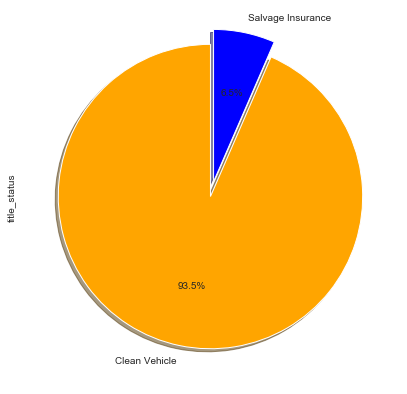

In [14]:
cars_df['title_status'].value_counts().plot(kind='pie',
                                            autopct='%1.1f%%',
                                            labels= ['Clean Vehicle','Salvage Insurance'],
                                            colors=['orange','blue'],
                                            shadow=True,
                                            figsize=(7,7),
                                            startangle=90,
                                            explode=[0,0.1])

### What is the average price of a vehicle of each brand?

In [15]:
cars_df['brand'].unique()

array(['toyota', 'ford', 'dodge', 'chevrolet', 'gmc', 'chrysler', 'kia',
       'buick', 'infiniti', 'mercedes-benz', 'jeep', 'bmw', 'cadillac',
       'hyundai', 'mazda', 'honda', 'heartland', 'jaguar', 'acura',
       'harley-davidson', 'audi', 'lincoln', 'lexus', 'nissan', 'land',
       'maserati', 'peterbilt', 'ram'], dtype=object)

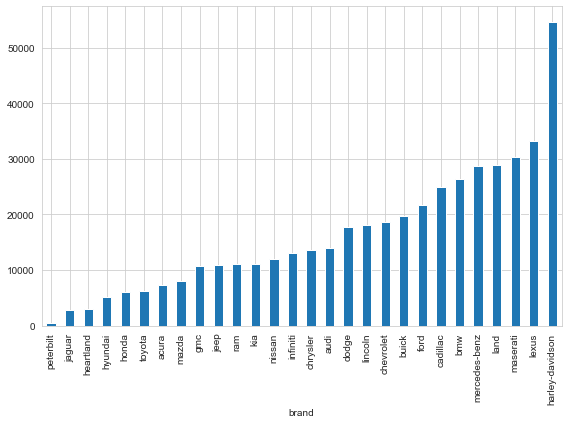

In [16]:
cars_df.groupby('brand')['price'].mean().sort_values().plot(kind='bar', figsize=(8,6))
plt.tight_layout()

### Let's see how the mean price of a vehicle has changed over the years

In [17]:
cars_df.groupby('year')['price'].mean()

year
1973    29800.000000
1984       25.000000
1993        0.000000
1994       12.500000
1995        0.000000
1996        0.000000
1997        0.000000
1998        6.250000
1999       25.000000
2000       43.750000
2001     1485.000000
2002      700.000000
2003     2547.222222
2004     1362.500000
2005     2387.500000
2006     3005.625000
2007      648.333333
2008     3750.277778
2009     2041.363636
2010     2167.307692
2011     8737.565217
2012     7657.333333
2013     8764.244186
2014    11817.355769
2015    15563.168367
2016    18280.911330
2017    18596.440318
2018    19058.339241
2019    24025.404709
2020    25083.854167
Name: price, dtype: float64

(2000, 2020)

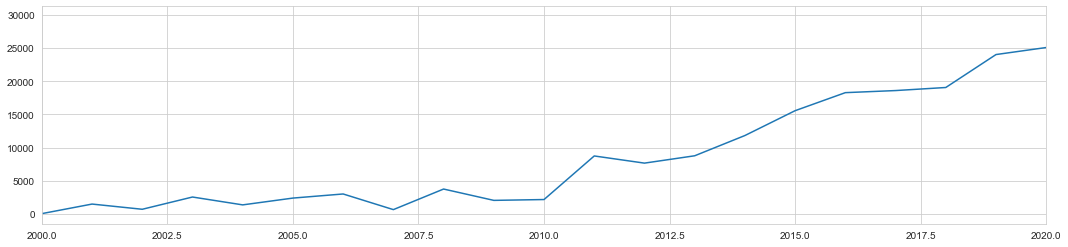

In [18]:
plt.figure(figsize=(18,4))
x1=cars_df.groupby('year')['price'].mean().index
y1=cars_df.groupby('year')['price'].mean().values
plt.plot(x1,y1)
plt.xlim(2000,2020)

The mean price has suddenly dropped to zero in the years between 1980 and 2000 is because we have also included the vehicles which are to salvage insurance. Now, let's consider only the clean vehicles and see how the average price of a vehicle has varied over the years.

In [19]:
cars_df[cars_df['title_status']=='clean vehicle'].groupby('year')['price'].mean()

year
1973    29800.000000
2001     3100.000000
2002     1400.000000
2003     5725.000000
2004     5100.000000
2005     4766.666667
2006     6473.333333
2007     1870.000000
2008    10680.000000
2009     4286.000000
2010     5360.000000
2011     9841.950000
2012    10049.448980
2013    10451.515152
2014    13044.010989
2015    16222.451087
2016    18728.188776
2017    18866.237838
2018    19176.196429
2019    24078.447072
2020    25617.021277
Name: price, dtype: float64

(2000, 2020)

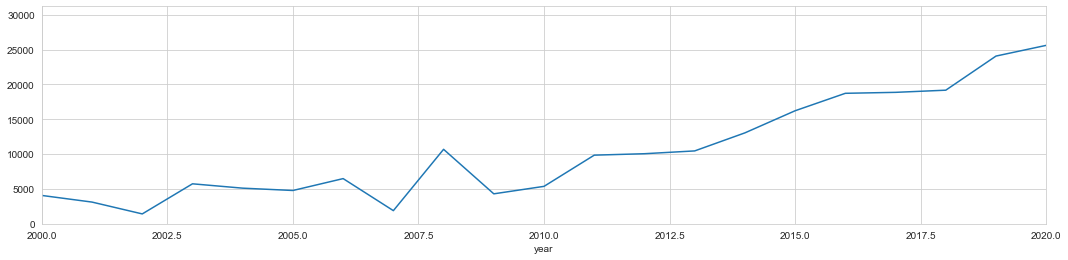

In [20]:
plt.figure(figsize=(18,4))
x2=cars_df[cars_df['title_status']=='clean vehicle'].groupby('year')['price'].mean().index
y2=cars_df[cars_df['title_status']=='clean vehicle'].groupby('year')['price'].mean().values
sns.lineplot(x2,y2)
plt.xlim(2000,2020)

The sudden drop from 1973 to 2001 is due to absence of information in that period

After that period there has been a steady growth in the average price of the vehicles except from 2006 to 2007 and 2008 to 2009.

The reason behind the drop in 2006 is unknown but the drop in 2008 might be due to the great Wall Street crash that year



### Let's see which brand dominates our dataset

In [21]:
brands=cars_df['brand'].value_counts().sort_values()
brands

jaguar                1
ram                   1
maserati              1
harley-davidson       1
toyota                1
lincoln               2
mazda                 2
lexus                 2
acura                 3
land                  4
audi                  4
peterbilt             4
heartland             5
mercedes-benz        10
cadillac             10
infiniti             12
honda                12
kia                  13
buick                13
hyundai              15
bmw                  17
chrysler             18
jeep                 30
gmc                  42
chevrolet           297
nissan              312
dodge               432
ford               1235
Name: brand, dtype: int64

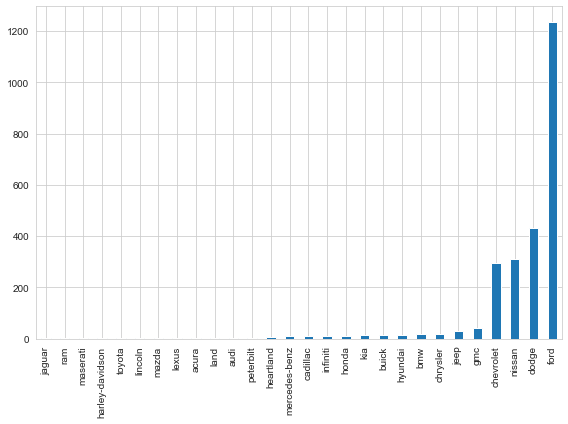

In [22]:
brands.plot(kind='bar',figsize=(8,6))
plt.tight_layout()            

### Which color is the most popular one for cars in this dataset?

In [23]:
cars_df['color'].value_counts().sort_values()

kona blue metallic                           1
pearl white                                  1
guard                                        1
maroon                                       1
toreador red                                 1
purple                                       1
lightning blue                               1
ruby red                                     1
competition orange                           1
royal crimson metallic tinted clearcoat      1
phantom black                                1
burgundy                                     1
glacier white                                1
ingot silver                                 1
light blue                                   1
tan                                          1
turquoise                                    1
morningsky blue                              1
dark blue                                    1
jazz blue pearlcoat                          1
tuxedo black metallic                        2
ruby red meta

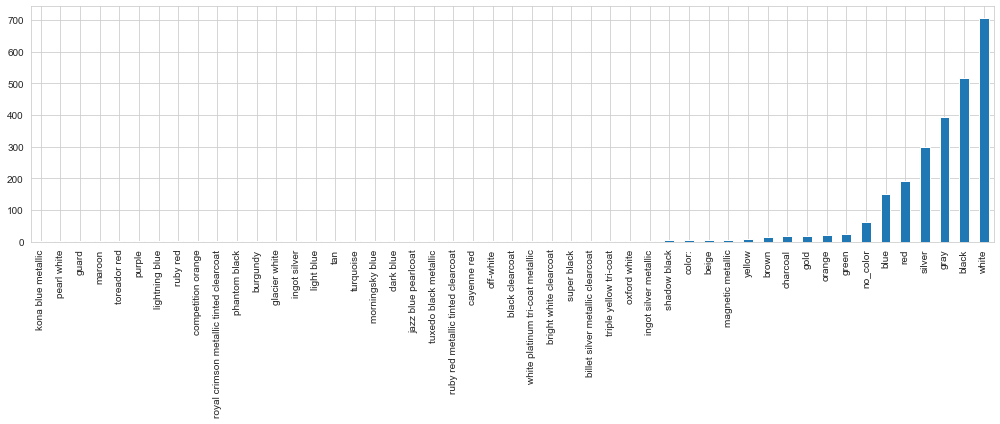

In [24]:
cars_df['color'].value_counts().sort_values().plot(kind='bar',figsize=(14,6))
plt.tight_layout()

It seems as if white colour is the most popular one in our data.

### Now let's take a look at how the average price of a vehicle varies from state to state

In [25]:
cars_df.groupby('state')['price'].mean().sort_values()

state
wyoming               0.000000
maryland            662.500000
montana            2825.000000
arkansas           3771.666667
utah               4875.000000
vermont            7498.000000
idaho             11500.000000
colorado          12676.190476
oregon            13109.259259
texas             13607.299065
arizona           14709.090909
connecticut       14713.600000
florida           15075.630081
west virginia     15447.619048
kansas            15500.000000
georgia           16050.313725
louisiana         16181.181818
missouri          16192.391304
new jersey        16209.712644
tennessee         16259.576923
north carolina    16485.273973
new hampshire     16757.500000
south carolina    17270.703125
ohio              17460.967742
massachusetts     17650.555556
rhode island      17808.000000
california        17836.710526
new york          17850.706897
minnesota         18207.352941
oklahoma          19839.084507
virginia          20041.000000
wisconsin         21103.191489
mi

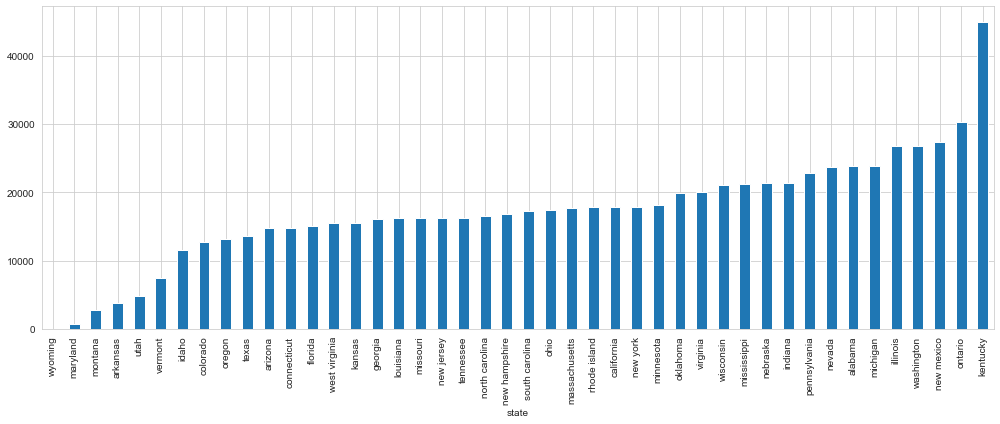

In [26]:
cars_df.groupby('state')['price'].mean().sort_values().plot(kind='bar', figsize=(14,6))
plt.tight_layout()

In [27]:
# Average price of clean vehicles from state to state
cars_df[cars_df['title_status']=='clean vehicle'].groupby('state')['price'].mean().sort_values()

state
utah               6964.285714
vermont            7498.000000
arkansas          10170.000000
oregon            13900.000000
texas             14386.862944
arizona           15168.750000
west virginia     15447.619048
florida           15628.851064
connecticut       15715.869565
louisiana         16181.181818
missouri          16192.391304
new jersey        16305.174419
new hampshire     16757.500000
north carolina    17011.347518
rhode island      17808.000000
new york          17850.706897
ohio              17979.666667
georgia           18287.295455
south carolina    18569.491525
california        18805.337079
colorado          18992.857143
minnesota         19447.747748
massachusetts     19729.090909
tennessee         20674.950000
wisconsin         21330.107527
nebraska          21350.000000
virginia          21619.156627
pennsylvania      22883.986577
mississippi       23793.333333
alabama           23872.058824
nevada            23914.285714
oklahoma          24032.758621
mi

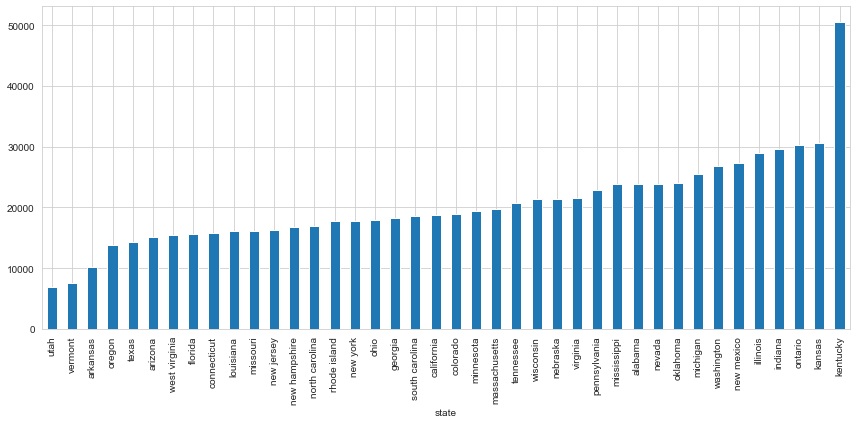

In [28]:
cars_df[cars_df['title_status']=='clean vehicle'].groupby('state')['price'].mean().sort_values().plot(kind='bar', figsize=(12,6))
plt.tight_layout()

### Let's analyse the mileage column and see which brand's vehicles give better mileages

In [29]:
cars_df.groupby('brand')['mileage'].mean().sort_values()

brand
heartland               1.000000
harley-davidson      9502.000000
jaguar              20849.000000
lexus               22391.000000
infiniti            25023.166667
land                26613.750000
ram                 30421.000000
maserati            37021.000000
buick               37926.846154
jeep                38723.266667
cadillac            40195.900000
nissan              42426.230769
dodge               44184.863426
bmw                 47846.411765
ford                52084.304453
lincoln             52123.000000
mercedes-benz       54597.000000
kia                 56609.461538
hyundai             56683.866667
gmc                 58548.738095
chevrolet           65124.461279
chrysler            73004.000000
mazda               82647.000000
honda               91599.000000
audi               118091.000000
acura              120379.666667
toyota             274117.000000
peterbilt          725615.750000
Name: mileage, dtype: float64

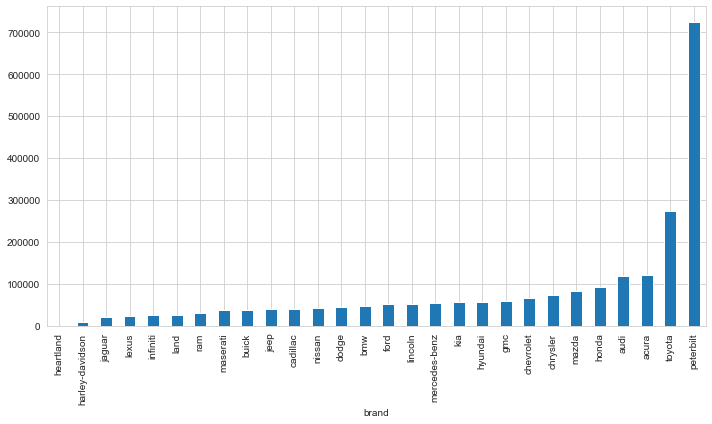

In [30]:
cars_df.groupby('brand')['mileage'].mean().sort_values().plot(kind='bar', figsize=(10,6))
plt.tight_layout()

In [31]:
# Average mileage of clean vehicles grouped by their brands 
cars_df[cars_df['title_status']=='clean vehicle'].groupby('brand')['mileage'].mean().sort_values()

brand
heartland               1.000000
harley-davidson      9502.000000
lincoln             14541.000000
jaguar              20849.000000
lexus               22391.000000
infiniti            25023.166667
land                26613.750000
jeep                28868.785714
buick               29632.083333
ram                 30421.000000
cadillac            32976.666667
bmw                 33763.428571
maserati            37021.000000
nissan              37838.522337
dodge               40144.951691
ford                46639.033563
mazda               47753.000000
kia                 48955.000000
gmc                 51031.945946
mercedes-benz       54597.000000
chevrolet           55954.011070
audi                56523.000000
hyundai             56683.866667
chrysler            58188.562500
honda               86052.727273
acura              121444.500000
toyota             274117.000000
Name: mileage, dtype: float64

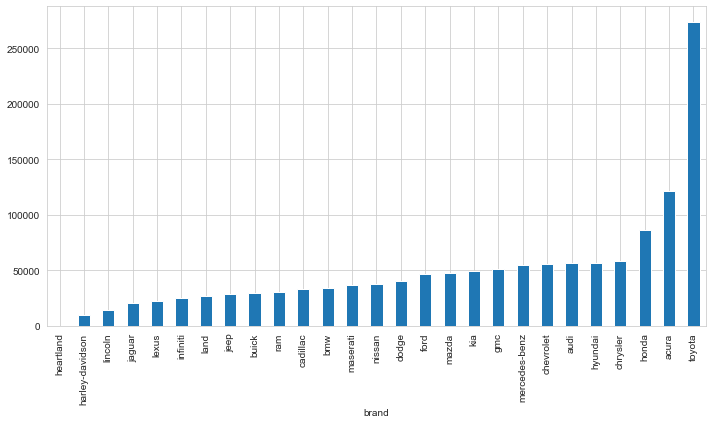

In [32]:
cars_df[cars_df['title_status']=='clean vehicle'].groupby('brand')['mileage'].mean().sort_values().plot(kind='bar', figsize=(10,6))
plt.tight_layout()                                                                                                       

### Now we will look at how the average price of the top 5 brands with the highest mileage has varied over the years

In [33]:
top5= cars_df.groupby('brand')['mileage'].mean().sort_values().tail(5).index
top5

Index(['honda', 'audi', 'acura', 'toyota', 'peterbilt'], dtype='object', name='brand')

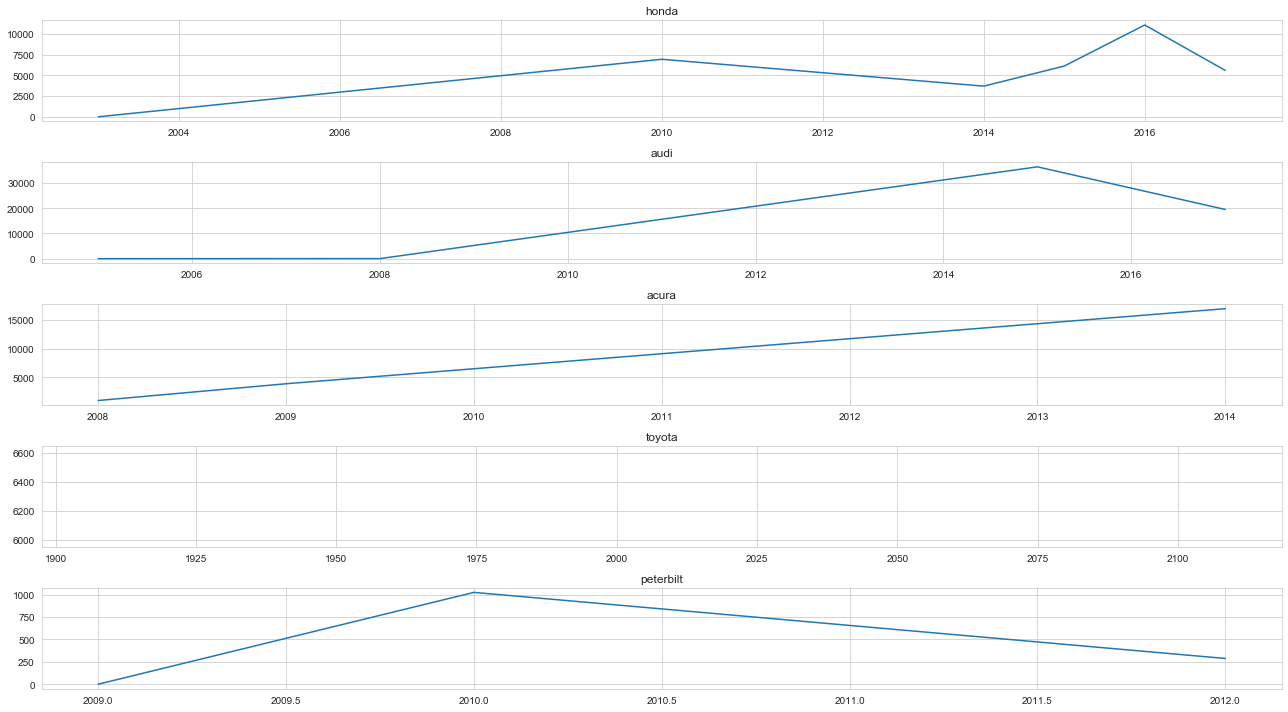

In [34]:
fig,axes = plt.subplots(nrows=len(top5), ncols=1, figsize=(18,10))
c=0
for i in top5:
    axes[c].plot(cars_df[cars_df['brand']==i].groupby('year')['price'].mean().index,cars_df[cars_df['brand']==i].groupby('year')['price'].mean().values)
    axes[c].set_title(i)
    c+=1
    plt.tight_layout()    
    

### considering only the clean vehicles

In [35]:
top= cars_df[cars_df['title_status']=='clean vehicle'].groupby('brand')['mileage'].mean().sort_values().tail(6)[:-1].index
#We are ignoring the last brand as it has only one and hence cannot be plotted
top

Index(['audi', 'hyundai', 'chrysler', 'honda', 'acura'], dtype='object', name='brand')

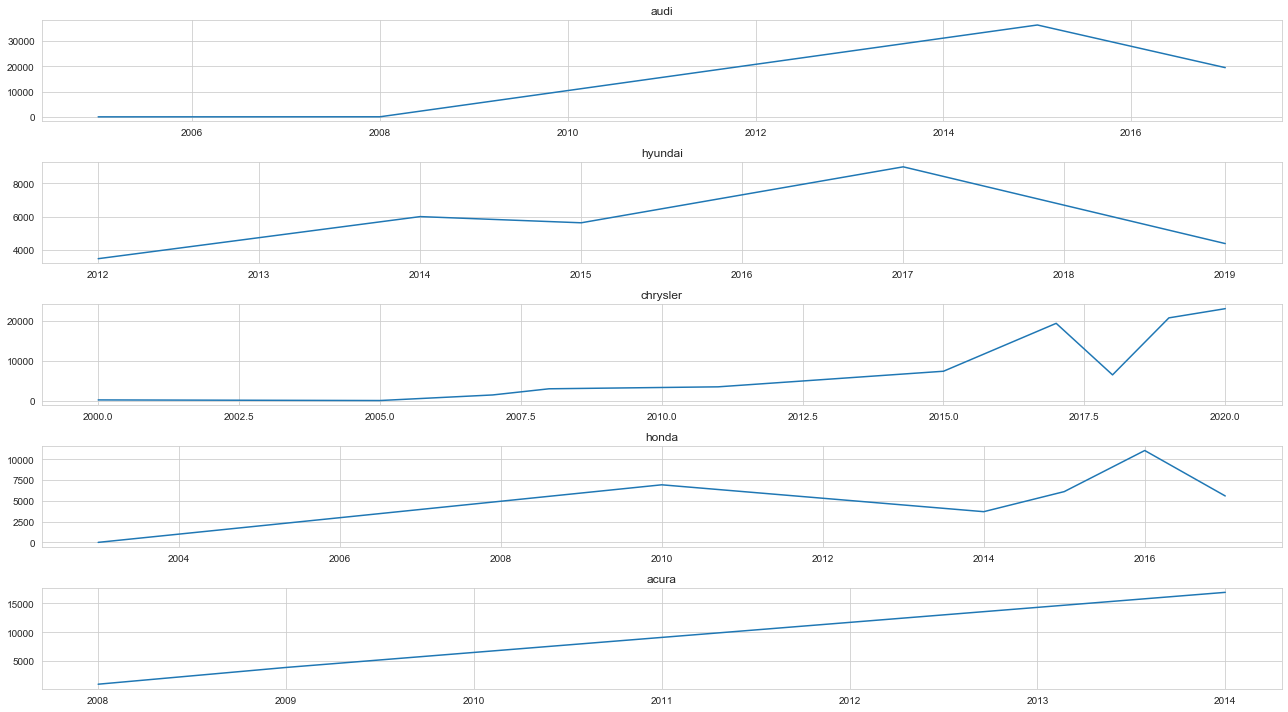

In [36]:
fig,axes = plt.subplots(nrows=len(top), ncols=1, figsize=(18,10))
c=0
for i in top:
    axes[c].plot(cars_df[cars_df['brand']==i].groupby('year')['price'].mean().index,cars_df[cars_df['brand']==i].groupby('year')['price'].mean().values)
    axes[c].set_title(i)
    c+=1
    plt.tight_layout()

### We will analyse how the average price of the 5 most popular brands has varied over the years 

In [37]:
pop5 = cars_df['brand'].value_counts().head(5).index
pop5

Index(['ford', 'dodge', 'nissan', 'chevrolet', 'gmc'], dtype='object')

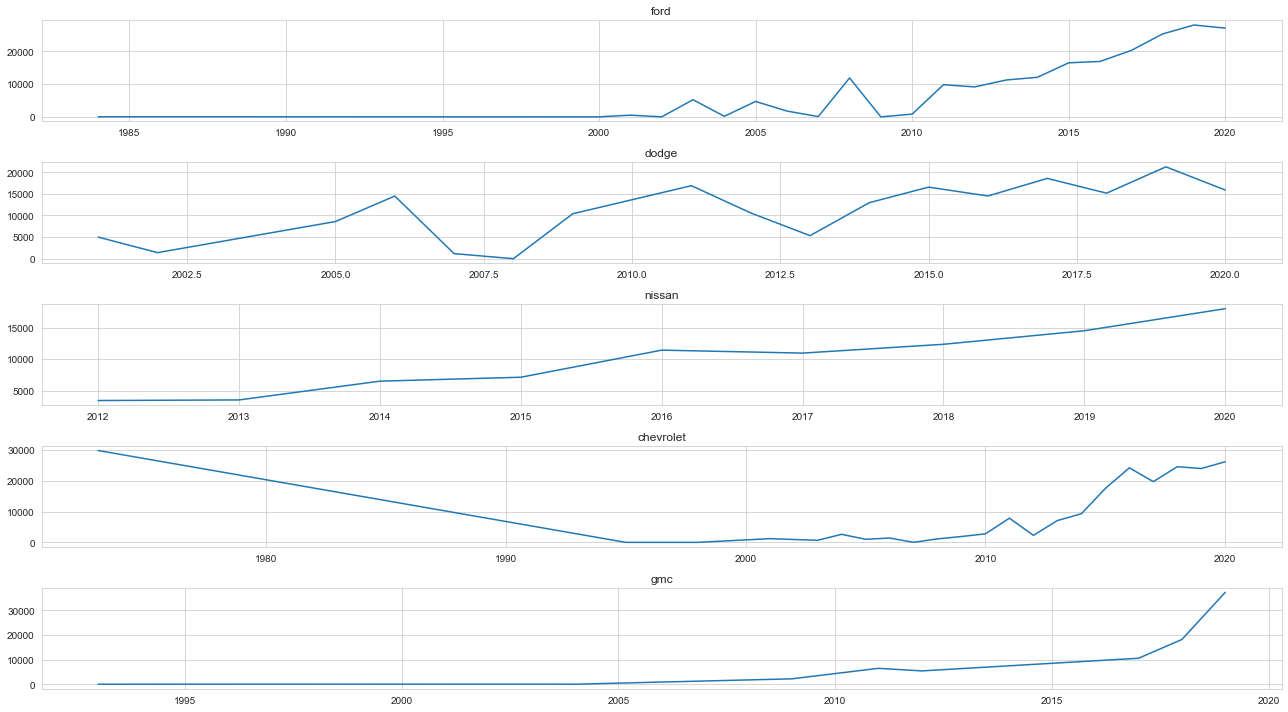

In [38]:
fig,axes = plt.subplots(nrows=len(pop5), ncols=1, figsize=(18,10))
c=0
for i in pop5:
    axes[c].plot(cars_df[cars_df['brand']==i].groupby('year')['price'].mean().index,cars_df[cars_df['brand']==i].groupby('year')['price'].mean().values)
    axes[c].set_title(i)
    c+=1
    plt.tight_layout()

## Machine Learning Model to predict the price of a vehicle

In [39]:
#Checking the head of our data
cars_df.head()

,price,brand,model,year,title_status,mileage,color,lot,state,country
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,159348797,new jersey,usa
1,2899,ford,se,2011,clean vehicle,190552.0,silver,166951262,tennessee,usa
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,167655728,georgia,usa
3,25000,ford,door,2014,clean vehicle,64146.0,blue,167753855,virginia,usa
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,167763266,florida,usa


### Train Test split

In [40]:
X = cars_df[['year','title_status','mileage','country','brand']]
y = cars_df['price']

In [41]:
X.head()

,year,title_status,mileage,country,brand
0,2008,clean vehicle,274117.0,usa,toyota
1,2011,clean vehicle,190552.0,usa,ford
2,2018,clean vehicle,39590.0,usa,dodge
3,2014,clean vehicle,64146.0,usa,ford
4,2018,clean vehicle,6654.0,usa,chevrolet


In [42]:
df1 = pd.get_dummies(X[['title_status','country','brand']], drop_first=True)
X.drop(['title_status','country','brand'],axis=1,inplace=True)
X = pd.concat([X,df1],axis=1)

C:\Users\Sain\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            2499 non-null   int64  
 1   mileage                         2499 non-null   float64
 2   title_status_salvage insurance  2499 non-null   uint8  
 3   country_ usa                    2499 non-null   uint8  
 4   brand_audi                      2499 non-null   uint8  
 5   brand_bmw                       2499 non-null   uint8  
 6   brand_buick                     2499 non-null   uint8  
 7   brand_cadillac                  2499 non-null   uint8  
 8   brand_chevrolet                 2499 non-null   uint8  
 9   brand_chrysler                  2499 non-null   uint8  
 10  brand_dodge                     2499 non-null   uint8  
 11  brand_ford                      2499 non-null   uint8  
 12  brand_gmc                       24

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Importing the model

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lrmodel = LinearRegression()

In [48]:
lrmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
predictions = lrmodel.predict(X_test)

### Evaluation of the model

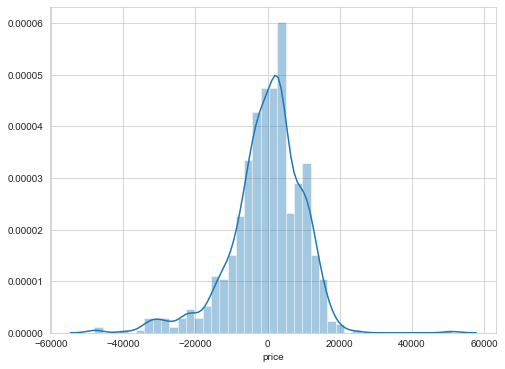

In [50]:
plt.figure(figsize=(8,6))
sns.distplot(predictions-y_test)

This depicts that our model's most errors lie near zero which is a very good sign

### Error in our model

In [51]:
from sklearn import metrics

In [52]:
print('MAE: ', metrics.mean_absolute_error(y_test,predictions))
print('MSE: ', metrics.mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  7332.861813746978
MSE:  100435075.33110362
RMSE:  10021.730156569953


In [53]:
#Let's find the mean price of a vehicle in our dataset, then we can compare the mean with our errors and see how our model has performed
y.mean()

18767.671468587436